# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
response = requests.get("http://api.openweathermap.org/data/2.5/weather?q="+cities[27]+"&appid=" + weather_api_key).json()
pprint(response["wind"]["speed"])

1.79


In [10]:


name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
for city in range(len(cities)):
    try:
        response = requests.get("http://api.openweathermap.org/data/2.5/weather?q="+cities[city]+"&appid=" + weather_api_key).json()
        city_name = response["name"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        temp = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        count = response["sys"]["country"]
        speed = response["wind"]["speed"]
        dt = response["dt"]
        
        name.append(city_name)
        Lat.append(latitude)
        Lng.append(longitude)
        Max_Temp.append(temp)
        Humidity.append(hum)
        Cloudiness.append(cloud)
        Country.append(count)
        Wind_Speed.append(speed)
        Date.append(dt)
        print("Testing city number " + str(city) + ". " + cities[city] + " found.")
    except:
        print("could not find " +cities[city]+ ".")

        


Testing city number 0. praxedis guerrero found.
Testing city number 1. nidzica found.
Testing city number 2. barrow found.
Testing city number 3. hermanus found.
could not find burica.
Testing city number 5. abrau-dyurso found.
Testing city number 6. dawei found.
Testing city number 7. bathsheba found.
Testing city number 8. pangnirtung found.
Testing city number 9. ushuaia found.
Testing city number 10. half moon bay found.
Testing city number 11. qaanaaq found.
Testing city number 12. kedrovyy found.
Testing city number 13. mataura found.
Testing city number 14. yellowknife found.
Testing city number 15. busselton found.
could not find illoqqortoormiut.
Testing city number 17. taoudenni found.
Testing city number 18. port elizabeth found.
Testing city number 19. santa rosa found.
Testing city number 20. sal rei found.
could not find grand river south east.
Testing city number 22. fairbanks found.
could not find tawkar.
Testing city number 24. chuy found.
could not find taolanaro.
Tes

Testing city number 211. bambous virieux found.
Testing city number 212. tabou found.
Testing city number 213. atuona found.
Testing city number 214. illela found.
Testing city number 215. caucaia found.
Testing city number 216. aranos found.
Testing city number 217. campbell river found.
Testing city number 218. nouadhibou found.
Testing city number 219. san cristobal found.
could not find afgoye.
Testing city number 221. bend found.
Testing city number 222. port lincoln found.
Testing city number 223. svetlyy found.
could not find cumaribo.
Testing city number 225. zavallya found.
Testing city number 226. saint-joseph found.
Testing city number 227. lebu found.
Testing city number 228. suraabad found.
Testing city number 229. zomin found.
Testing city number 230. saldanha found.
Testing city number 231. chicama found.
could not find karamay.
Testing city number 233. hefei found.
Testing city number 234. kutum found.
Testing city number 235. takoradi found.
Testing city number 236. au

Testing city number 416. mahebourg found.
Testing city number 417. beyneu found.
Testing city number 418. samarai found.
Testing city number 419. ust-tsilma found.
Testing city number 420. saint anthony found.
Testing city number 421. safranbolu found.
Testing city number 422. ilinskaya found.
Testing city number 423. olafsvik found.
Testing city number 424. pisco found.
Testing city number 425. lebork found.
Testing city number 426. awbari found.
Testing city number 427. opuwo found.
Testing city number 428. manzanillo found.
Testing city number 429. magadan found.
Testing city number 430. kelvington found.
Testing city number 431. denpasar found.
Testing city number 432. iquique found.
Testing city number 433. san jeronimo found.
Testing city number 434. kabanjahe found.
Testing city number 435. winnemucca found.
Testing city number 436. prainha found.
Testing city number 437. shitanjing found.
Testing city number 438. fairview found.
Testing city number 439. velikiy ustyug found.
Te

Testing city number 618. bourail found.
Testing city number 619. lisakovsk found.
Testing city number 620. lorengau found.
Testing city number 621. ganganagar found.
Testing city number 622. dhidhdhoo found.
Testing city number 623. borovichi found.
Testing city number 624. yeppoon found.
Testing city number 625. domoni found.
Testing city number 626. leh found.
Testing city number 627. khatima found.
Testing city number 628. tiarei found.
Testing city number 629. katobu found.
Testing city number 630. cascais found.
Testing city number 631. dingle found.
Testing city number 632. thinadhoo found.
Testing city number 633. bilibino found.
Testing city number 634. iqaluit found.
Testing city number 635. namatanai found.
Testing city number 636. grand gaube found.
Testing city number 637. conceicao da barra found.
Testing city number 638. jinchang found.
Testing city number 639. zonguldak found.
Testing city number 640. marsa matruh found.
Testing city number 641. maraba found.
Testing cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
print(len(name)) 
print(len(Lat)) 
print(len(Lng)) 
print(len(Max_Temp)) 
print(len(Humidity)) 
print(len(Cloudiness)) 
print(len(Wind_Speed)) 
print(len(Country)) 
print(len(Date))


602
602
602
602
602
602
602
602
602


In [13]:
data = pd.DataFrame({"City": name,
                     "Lat": Lat,
                     "Lng": Lng,
                     "Max_Temp": Max_Temp,
                     "Humidity": Humidity,
                     "Cloudiness": Cloudiness,
                     "Wind_Speed": Wind_Speed,
                     "Country": Country,
                     "Date": Date})
data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Praxédis Guerrero,31.37,-106.02,295.15,13,5,1.48,MX,1603252043
1,Nidzica,53.36,20.43,280.15,93,40,3.60,PL,1603252044
2,Barrow,71.29,-156.79,271.15,86,90,5.70,US,1603252044
3,Hermanus,-34.42,19.23,283.71,84,0,0.89,ZA,1603252044
4,Abrau-Dyurso,44.69,37.59,281.15,75,40,2.00,RU,1603252045


In [14]:
data.to_csv("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
data["Humidity"].unique()

array([ 13,  93,  86,  84,  75,  69,  83,  94,  60,  70,  61,  92,  68,
        19,  88,  85,  72,  48,  50,  97,  58,  80, 100,  22,  76,  87,
        67,  81,  32,  55,  63,  73,  59,  66,  98,  51,  95,  25,  79,
        78,  28,  34,  71,  74,  96,  21,  89,  57,  47,  65,  26,  56,
        54,  49,  40,  24,  29,  62,  42,  52,  38,  77,  82,  35,  64,
        91,  23,  20,  31,  37,  53,  90,  16,  44,  41,  12,  99,  30,
        36,  18,  45,  17,  14,  39], dtype=int64)

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature (F) vs. Latitude')

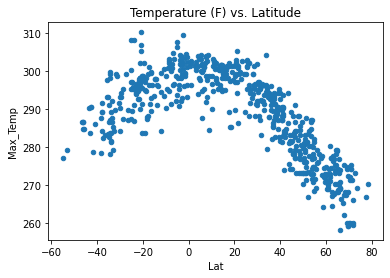

In [23]:
data.plot.scatter(x = "Lat", y = "Max_Temp")
plt.title("Temperature (F) vs. Latitude")
plt.savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity (%) vs. Latitude')

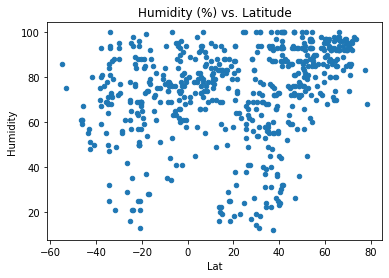

In [24]:
data.plot.scatter(x = "Lat", y = "Humidity")
plt.title("Humidity (%) vs. Latitude")
plt.savefig("../output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness (%) vs. Latitude')

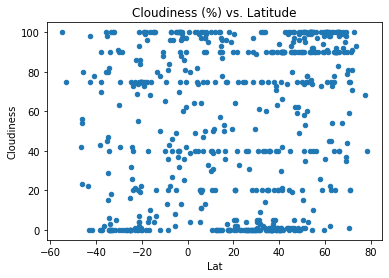

In [25]:
data.plot.scatter(x = "Lat", y = "Cloudiness")
plt.title("Cloudiness (%) vs. Latitude")
plt.savefig("../output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed (mph) vs. Latitude')

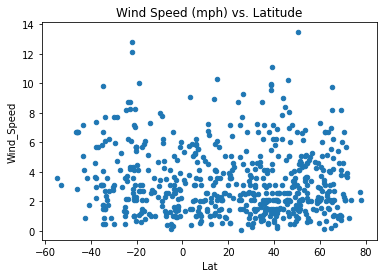

In [26]:
data.plot.scatter(x = "Lat", y = "Wind_Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [28]:
North_data = data[data["Lat"] >= 0]
North_data.head()
South_data = data[data["Lat"] < 0]
South_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
3,Hermanus,-34.42,19.23,283.71,84,0,0.89,ZA,1603252044
8,Ushuaia,-54.80,-68.30,277.15,86,100,3.60,AR,1603252046
12,Mataura,-46.19,168.86,286.48,61,23,6.71,NZ,1603252047
14,Busselton,-33.65,115.33,292.04,68,18,2.68,AU,1603252047
16,Port Elizabeth,-33.92,25.57,281.15,93,3,1.50,ZA,1603252048


In [43]:
def linear_regression(x, y, x_label, y_label, title):
    plt.scatter(x, y)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, slope*x + intercept, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

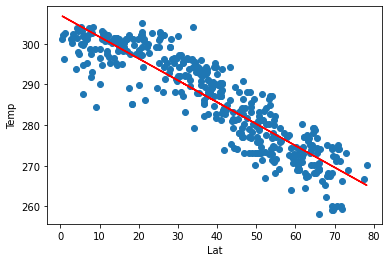

In [44]:

linear_regression(North_data["Lat"], North_data["Max_Temp"], "Lat", "Temp", "Lat v Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
linear_regression(South_data["Lat"], N_data["Max_Temp"], "Lat", "Temp", "Lat v Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression